<img src="logo.jpg" />

## [Pedram Jahangiry](https://github.com/PJalgotrader) 

# K Nearest Neigbors (KNN) - Regression

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions

In [20]:
rand_state = 1000

In [21]:
df = pd.read_csv("wage.csv")

In [22]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,769000.0,40,93,12,11,2,31,1,0,8.0,8.0
1,808000.0,50,119,18,11,16,37,1,0,14.0,14.0
2,825000.0,40,108,14,11,9,33,1,0,14.0,14.0
3,650000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,562000.0,40,74,11,14,5,34,1,0,6.0,11.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      857 non-null float64
feduc      741 non-null float64
dtypes: float64(3), int64(8)
memory usage: 80.4 KB


## Data preprocessing 

In [24]:
df.isna().sum()  

wage         0
hours        0
IQ           0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
meduc       78
feduc      194
dtype: int64

In [25]:
df.drop('feduc', axis=1, inplace=True)

In [26]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
wage       935 non-null float64
hours      935 non-null int64
IQ         935 non-null int64
educ       935 non-null int64
exper      935 non-null int64
tenure     935 non-null int64
age        935 non-null int64
married    935 non-null int64
black      935 non-null int64
meduc      935 non-null float64
dtypes: float64(2), int64(8)
memory usage: 73.1 KB


In [27]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

## Data visualization 

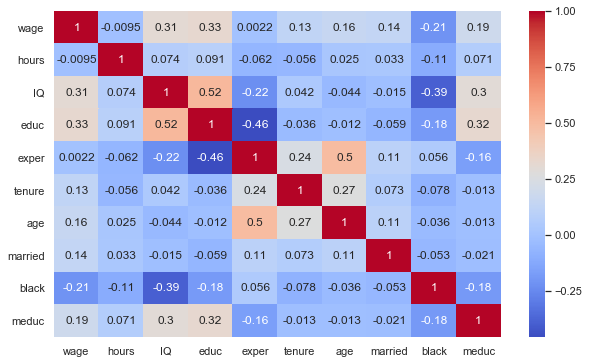

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

### Defining the variables and splitting the data

In [29]:
y = df['wage']
X = df.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [30]:
X_train.head()

,hours,IQ,educ,exper,tenure,age,married,black,meduc
932,45,77,12,12,10,28,1,1,7.0
82,40,96,11,15,3,37,1,0,8.0
370,40,123,17,14,7,38,1,0,12.0
452,40,109,12,14,1,36,1,0,9.0
132,40,97,12,10,4,31,1,0,12.0


## Scaling the features: 

The following step is very important for **Classification** specially for KNN. Because any variable on the larger scale, has a larger effect on the distance between observations. 

In general we need to rescale our variables. If we don't rescale the salary in this example, then the model may always return T or F. We have two options now:

1. Rescale the entire data set using StandardScaler
2. Rescale the individual features.

For KNN it is highly recommended that we use the first method and this is what I will do after splitting the data into train and test. 

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

###  KNN Regression with Sklearn

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
# Fitting KNN regression to the Training set

KNN_regression = KNeighborsRegressor(n_neighbors=5)
KNN_regression.fit(X_train, y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [36]:
# Predicting the Test set results
y_pred_test = KNN_regression.predict(X_test)

In [35]:
predictions = pd.DataFrame({ 'y_actual_test':y_test,'y_pred_test':y_pred_test, 'resid':y_test - y_pred_test})
predictions.head()

,y_actual_test,y_pred_test,resid
434,975000.0,774000.0,201000.0
238,1730000.0,1583400.0,146600.0
531,675000.0,796800.0,-121800.0
157,1899000.0,928800.0,970200.0
601,1500000.0,1250800.0,249200.0


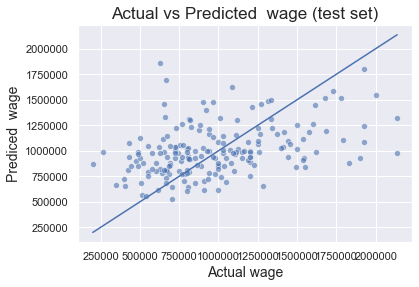

In [18]:
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

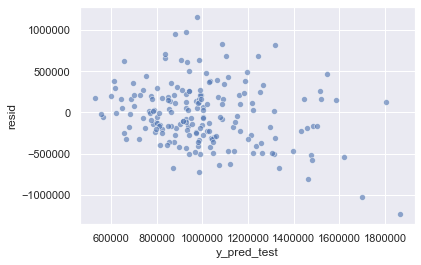

In [19]:
sns.scatterplot(x='y_pred_test', y='resid' ,data=predictions, alpha=0.6)
plt.show()


### evaluating the model on test dataset

In [20]:
MSE_test = round(np.mean(np.square(y_test - y_pred_test)),2)
MSE_test

136929711443.85

In [21]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

370040.15

### Cross validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )

In [24]:
CV_MSE = round(np.mean(-NMSE),2)
CV_MSE

162002134704.14

In [25]:
CV_RMSE = round(np.sqrt(CV_MSE))
CV_RMSE

402495.0

## Choosing K


In [26]:
CV_RMSE=[]
test_RMSE = []

k=50

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    CV_RMSE.append(np.mean(RMSE_i))
    
    test_RMSE.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'CV_RMSE': np.round(CV_RMSE,2), 'test_RMSE':np.round(test_RMSE,2)}, index=range(1,k))

In [28]:
optimal_k.head(10)

,CV_RMSE,test_RMSE
1,488362.95,508027.17
2,445952.20,437261.28
3,421453.17,408412.77
4,405513.47,382363.64
5,402494.89,370040.15
6,399228.80,361765.29
7,393934.52,349691.74
8,391567.65,350728.97
9,388726.35,347333.45
10,386381.70,348726.65


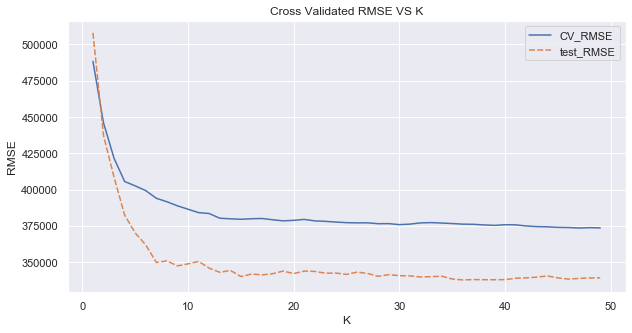

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

By looking at this graph, What is the optimal K?

###  Additional links:
1. Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance
